In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 20px; }</style>"))

# Theory Computing - Neutron Stars: Notebook 2
<div style="text-align: right"> Jude McClay and Rasheed Miladi </div>

$\frac{dp}{dr} = -\frac{G\rho (r) M(r)}{r^2} = -\frac{G\epsilon (r) M(r)}{c^2 r^2}$ (1)

$\frac{dM}{dr} = 4\pi r^2 \rho (r) = \frac{4\pi r^2 \epsilon (r)}{c^2}$ (2)

$\epsilon (r) = \rho (r) c^2$

Tolman-Oppenheimer-Volkov (TOV) equation:

$\frac{dp}{dr} = -\frac{G\epsilon (r) M(r)}{c^2r^2} \left[1 + \frac{p(r)}{\epsilon(r)} \right] \left[1 + \frac{4\pi r^3 \rho(r)}{M(r) c^2} \right] \left[1 - \frac{2GM(r)}{c^2 r}\right]^{-1}$

$K_{rel} = \frac{\hbar c}{12\pi^2}(\frac{3\pi^2 Z}{m_N c^2 A})^{\frac{4}{3}}$

or

$K_{non-rel} = \frac{\hbar^2}{15\pi^2 m_e}(\frac{3\pi^2 Z}{Am_n c^2})^{\frac{5}{3}}$

where $Z$ is the Proton number and $A$ is the Atomic Mass number. For a star predominantly composed of $^{12}C$, the ratio $\frac{Z}{A} = \frac{1}{2}$.

Define dimensionless constants:

$\bar{M}(r) = \frac{M(r)}{M_{\odot}}$, so we can rewrite Equation 1 as:

$\frac{dp(r)}{dr}=-\frac{GM_{\odot}}{c^2}\frac{\epsilon(r) \bar{M}(r)}{r^2} = -R_0 \frac{\epsilon(r)\bar{M}(r)}{r^2}$

$\bar{p} = \frac{p}{\epsilon_0}$

$\bar{\epsilon} = \frac{\epsilon}{\epsilon_0}$,

where $\epsilon_0$ is an arbitrary constant, and not the same as the $\epsilon_0$ defined at the beginning of the paper.

For a polytrope,

$p = K\epsilon^{\gamma}$,

so we can write

$\bar{p} = \bar{K} \bar{\epsilon}^{\gamma}$, where $\bar{K}=K\epsilon_0^{\gamma-1}$ is dimensionless.

It is easier to solve the equation in $\frac{dp}{dr}$ for $\bar{p}$, so we should express $\bar{\epsilon}$ in terms of it:

$\bar{\epsilon} = (\frac{\bar{p}}{\bar{K}})^{\frac{1}{\gamma}}$

$\Longrightarrow \frac{d\bar{p}(r)}{dr}=-R_0 \frac{\epsilon(r)\bar{M}(r)}{r^2}=-\frac{\alpha \bar{p}(r)^{\frac{1}{\gamma}}\bar{M}(r)}{r^2}$, where $\alpha = \frac{R_0}{\bar{K}^{\frac{1}{\gamma}}} = \frac{R_0}{(K\epsilon_0^{\gamma-1})^{\frac{1}{\gamma}}}$.

It can be seen from this that the units of $\alpha$ have units of Km.

We can choose any convenient value for $\alpha$ since $\epsilon_0$ has not been defined, so we define:

$\epsilon_0 = \left[\frac{1}{K}(\frac{R_0}{\alpha})^{\gamma}\right]^{1-\gamma}$.

We also need to rewrite Equation 2

$\frac{dM(r)}{dr}=\frac{4\pi r^2 \epsilon (r)}{c^2}$

in terms of our dimensionless quantities:

$\frac{d\bar{M}(r)}{dr}=\frac{4\pi\epsilon_0}{M_{\odot}c^2\bar{K}^{\frac{1}{\gamma}}}r^2\bar{p}(r)^{\frac{1}{\gamma}}
=\frac{4\pi\epsilon_0}{M_{\odot}c^2(K\epsilon_0^{\gamma-1})^{\frac{1}{\gamma}}}r^2\bar{p}(r)^{\frac{1}{\gamma}}
=\beta r^2 \bar{p}(r)^{\frac{1}{\gamma}}$.

So we have:

$\frac{d\bar{p}(r)}{dr}=-\frac{\alpha \bar{p}(r)^{\frac{1}{\gamma}}\bar{M}(r)}{r^2}$ (3), 

where $\alpha = \frac{GM_{\odot}}{c^2}\frac{1}{(K\epsilon_0^{\gamma-1})^{\frac{1}{\gamma}}}$,

and

$\frac{d\bar{M}(r)}{dr}=\beta r^2 \bar{p}(r)^{\frac{1}{\gamma}}$ (4),

where $\beta = \frac{4\pi\epsilon_0}{M_{\odot}c^2(K\epsilon_0^{\gamma-1})^{\frac{1}{\gamma}}}$.

EPSILON NOUGHT CGS UNITS

In [3]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
from scipy import constants
from scipy.integrate import solve_ivp

from matplotlib import rc
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rcParams['figure.dpi'] = 100
%matplotlib inline


from IPython.display import Latex, display

In [4]:
p_0 = 2.33002 * 10**22 #dyne / cm^2 (1 dyne/cm^2 = 0.1 N/m^2)

G = constants.gravitational_constant #m**3 kg**-1 s**-2
c = constants.speed_of_light #m/s
#n = 3/2
solar_mass = 2 * 10**30 #kg
R_0 = (G * solar_mass)/(1000 * c**2) #km
#K = 1.210374449 * 10**-13 #K_rel: (J m**(-3))**(-1/3)
#K_cgs = 5.618060527 * 10**-14 #K_rel: (ergs/cm**3)**(-1/3)

K = 1.7239577222 * 10**-22 #K_non-rel: (J m**(-3))**(-2/3)
K_cgs = 3.714153244 * 10**-23 #K_non-rel: (ergs/cm**3)**(-2/3)



alpha = 0.05 #km
beta = 0.005924 #km**-3
gamma = 5/3
p_bar_0 = 10**-15

epsilon_0 = (K_cgs**(-1) * (R_0 / alpha)**gamma)**(1 - gamma)

#display(Latex("The value of $\\epsilon_0$ is {:4.3f} ergs cm$^{{-3}}$".format(epsilon_0)))

In [15]:
def differential_equations(t, y, alpha, beta, gamma): 
    """
    Returns the right hand sides of the two differential Equations 3 and 4 above.
    t ---- r values (units of km)
    y ---- array: 
        
        y[0] --- p_bar (dimensionless pressure)
        y[1] --- M_bar (dimensionless mass [units of solar masses])
    
    alpha, beta and gamma are constants
    """
    return[-(alpha * (y[0])**(1/gamma) * y[1])/(t**2), beta * t**2 * (y[0])**(1/gamma)]

def reach_zero(t, y, alpha, beta, gamma):
    """
    Returns the value of p_bar at each point.
    """
    return y[0]

reach_zero.terminal = True #terminates integration when p_bar = 0.
reach_zero.direction = +1

results = solve_ivp(differential_equations, [0.01, 100000], [p_bar_0, 0], max_step = 1000, args=(alpha, beta, gamma), events = reach_zero)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [16]:
print(results.message)
r_values = results.t
p_bar_values = results.y[0]
M_bar_values = results.y[1]


Required step size is less than spacing between numbers.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

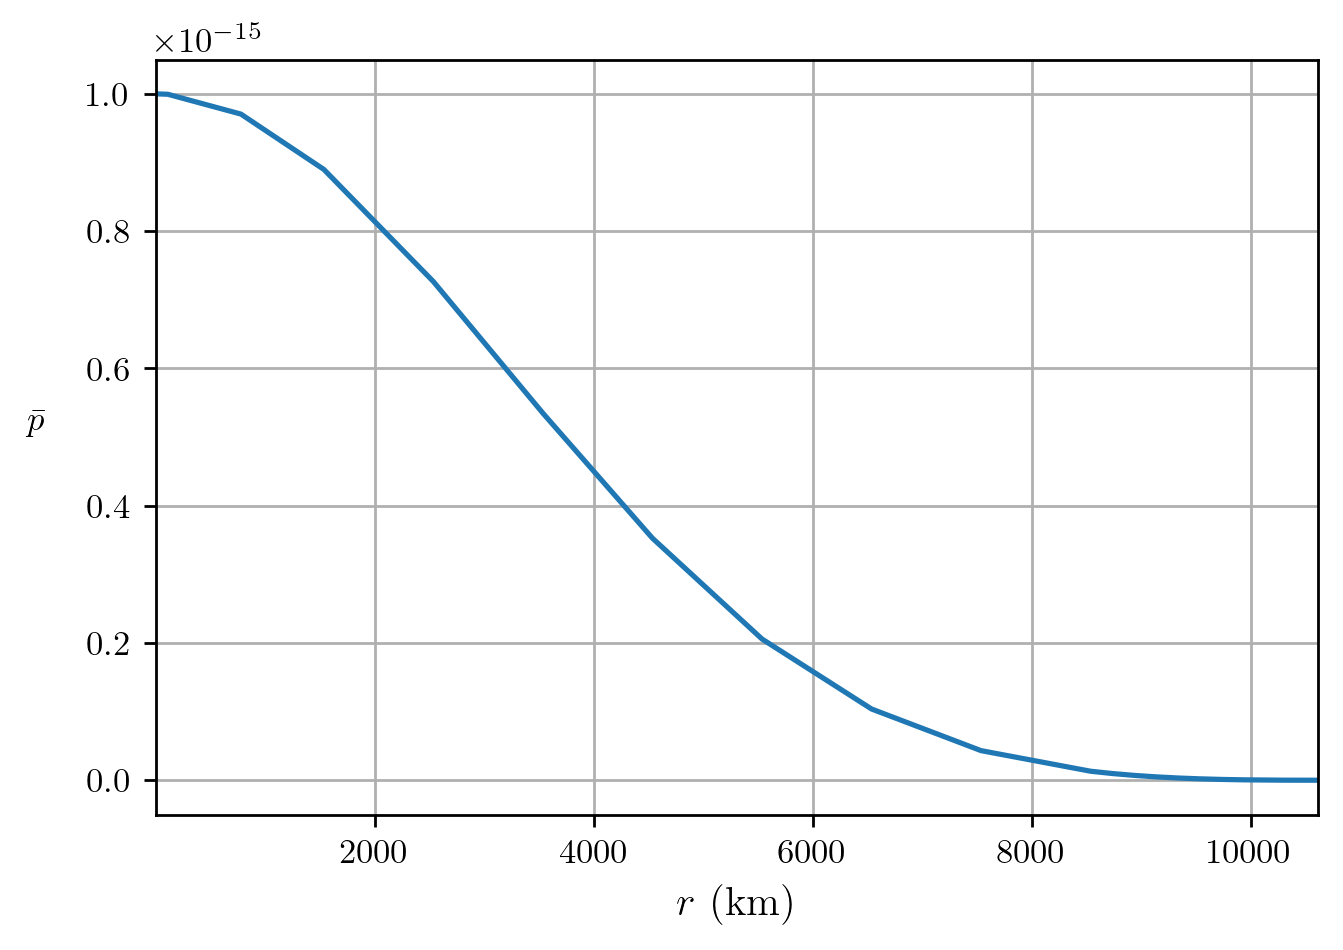

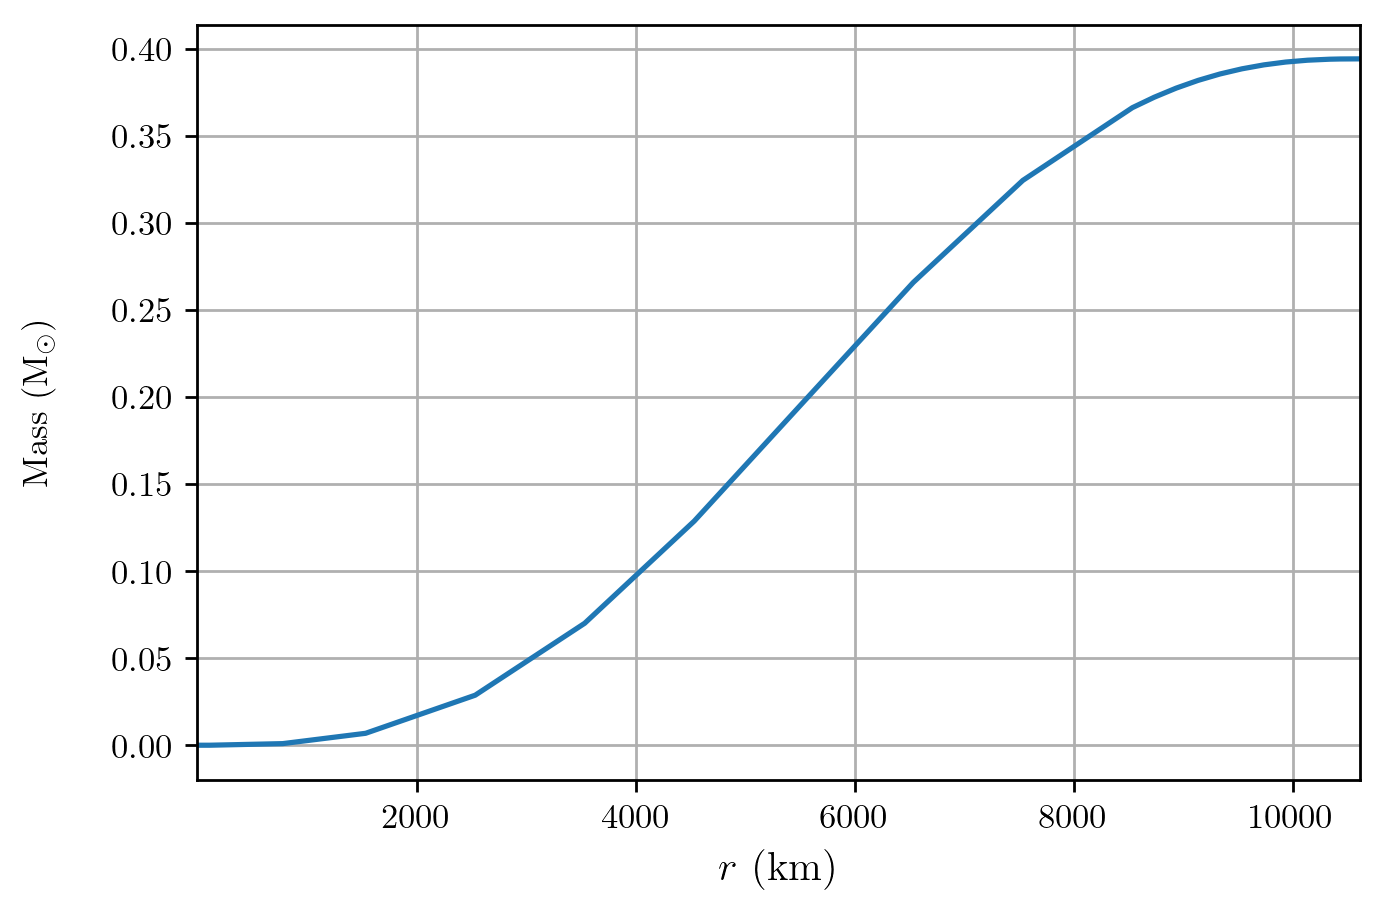

In [17]:
display(Latex("The radius of the star is ${0:5.2f}$ km.".format(r_values[-1])))
display(Latex("The mass of the star is ${0:4.3f}$ $\mathrm{{M}}_{{\\odot}}$.".format(M_bar_values[-1])))

fig1 = plt.figure(dpi = 250)
ax1 = fig1.add_subplot(111)
#ax1.set_ylim(bottom = 0., top = 1.1)
ax1.plot(r_values, p_bar_values)
ax1.set_xlabel("$r$ (km)", fontsize = "large")
ax1.set_ylabel("$\\bar{{p}}$", rotation = 0, labelpad = 15)
ax1.margins(x = 0)
ax1.grid()

fig2 = plt.figure(dpi = 250)
ax2 = fig2.add_subplot(111)
#ax2.set_xlim(left = 0., right = 1.01)
#ax2.set_ylim(bottom = 0., top = 1.1)
ax2.plot(r_values, M_bar_values)
ax2.set_xlabel("$r$ (km)", fontsize = "large")
ax2.set_ylabel("Mass ($\mathrm{M}_{\odot}$)", labelpad = 15)
ax2.margins(x = 0)
ax2.grid()

plt.show()